# EM-DAT Exploratory Data Analysis

CSCI 4622 | Team Disaster

This notebook is resposible for the cleanup process for the EM-DAT database. 

## Data Acquisition

In [23]:
# Import necessary libraries for Data cleaning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import geopandas as gpd
# import plotly.express as px

***

## Exploratory Data Analysis (EDA)

In [24]:
# Load the dataset
data = pd.read_csv("./data/emdat_2020-2024_cleaned.csv")
# data.head()

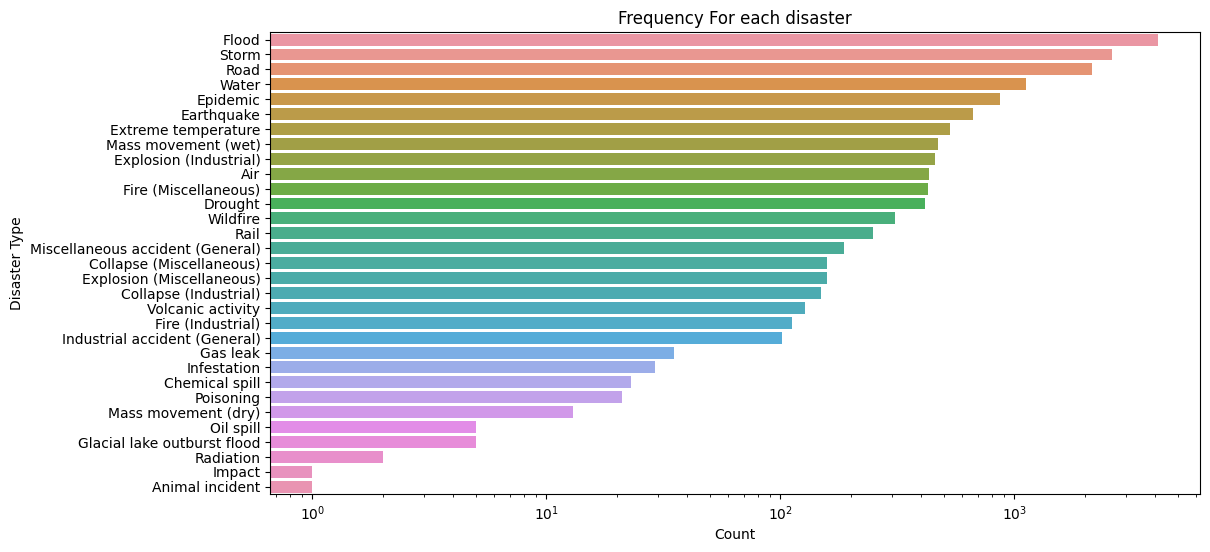

In [25]:
# Create a Frequency chart for Disaster Type
plt.figure(figsize=(12, 6))
sns.countplot(y='Disaster Type', data=data, order=data['Disaster Type'].value_counts().index)

plt.title('Frequency For each disaster')
plt.xlabel('Count')
plt.ylabel('Disaster Type')
plt.xscale('log')  # Use a logarithmic scale
plt.show()

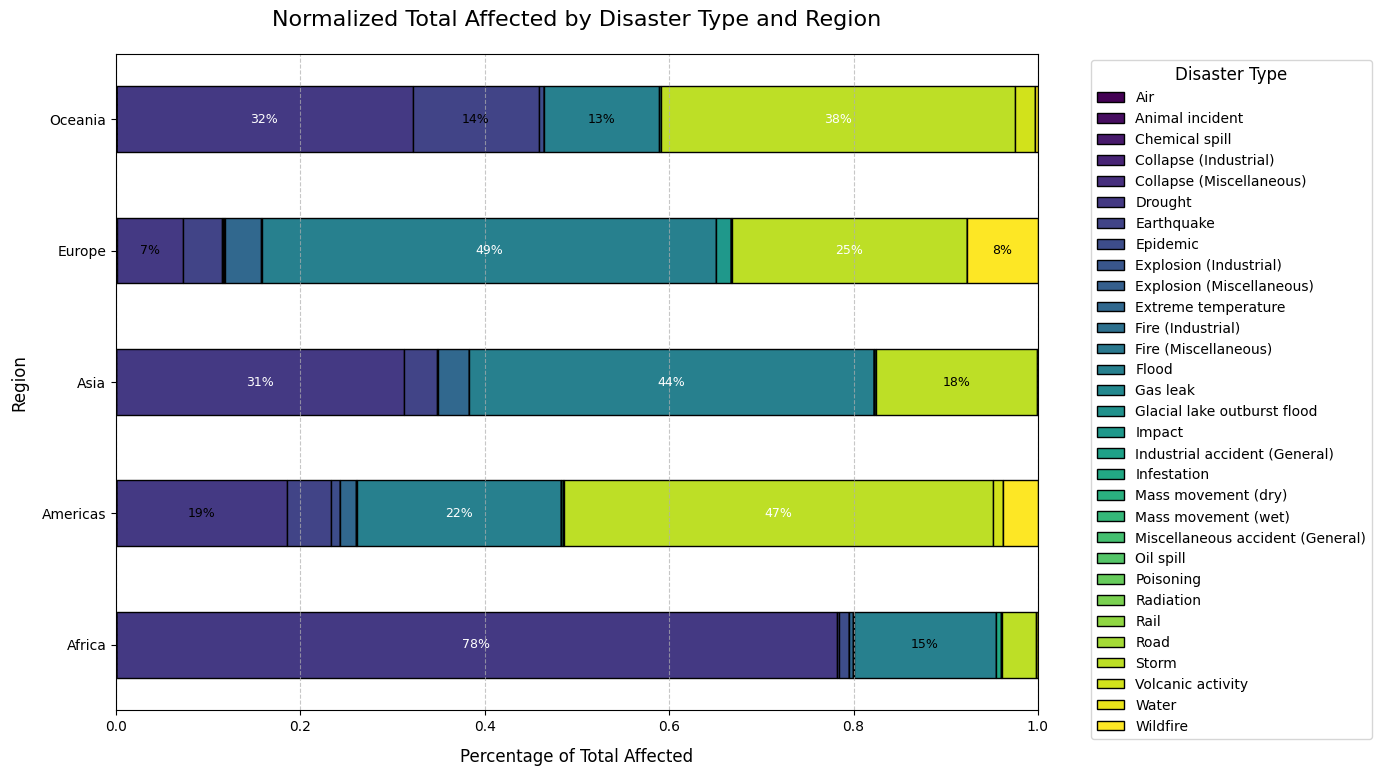

In [26]:
# Preprocess the data
# Group by region and disaster type, summing the total affected population
impact_by_region = data.groupby(['Region', 'Disaster Type'])['Total Affected'].sum().unstack(fill_value=0)

# Normalize the impact data by region
normalized_impact = impact_by_region.div(impact_by_region.sum(axis=1), axis=0)

# Create a stacked bar plot
fig, ax = plt.subplots(figsize=(14, 8))
normalized_impact.plot(
    kind='barh',
    stacked=True,
    colormap='viridis',
    ax=ax,
    edgecolor='black'  # Add edge color for clarity
)

# Customize the plot
ax.set_title('Normalized Total Affected by Disaster Type and Region', fontsize=16, pad=20)
ax.set_xlabel('Percentage of Total Affected', fontsize=12, labelpad=10)
ax.set_ylabel('Region', fontsize=12, labelpad=10)
ax.set_xlim(0, 1)  # Since data is normalized, x-axis should range from 0 to 1
ax.tick_params(axis='both', labelsize=10)
ax.grid(axis='x', linestyle='--', alpha=0.7)  # Add gridlines for x-axis

# Add percentage labels inside the bars
for i in range(len(normalized_impact)):
    row_data = normalized_impact.iloc[i]
    cumulative = 0
    for j, value in enumerate(row_data):
        if value > 0.05:  # Only label segments large enough to display
            ax.text(
                cumulative + value / 2,
                i,
                f"{value:.0%}",
                ha='center',
                va='center',
                fontsize=9,
                color='white' if value > 0.2 else 'black'
            )
        cumulative += value

# Add legend and adjust layout
ax.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize=12)
fig.tight_layout()

# Show the improved plot
plt.show()

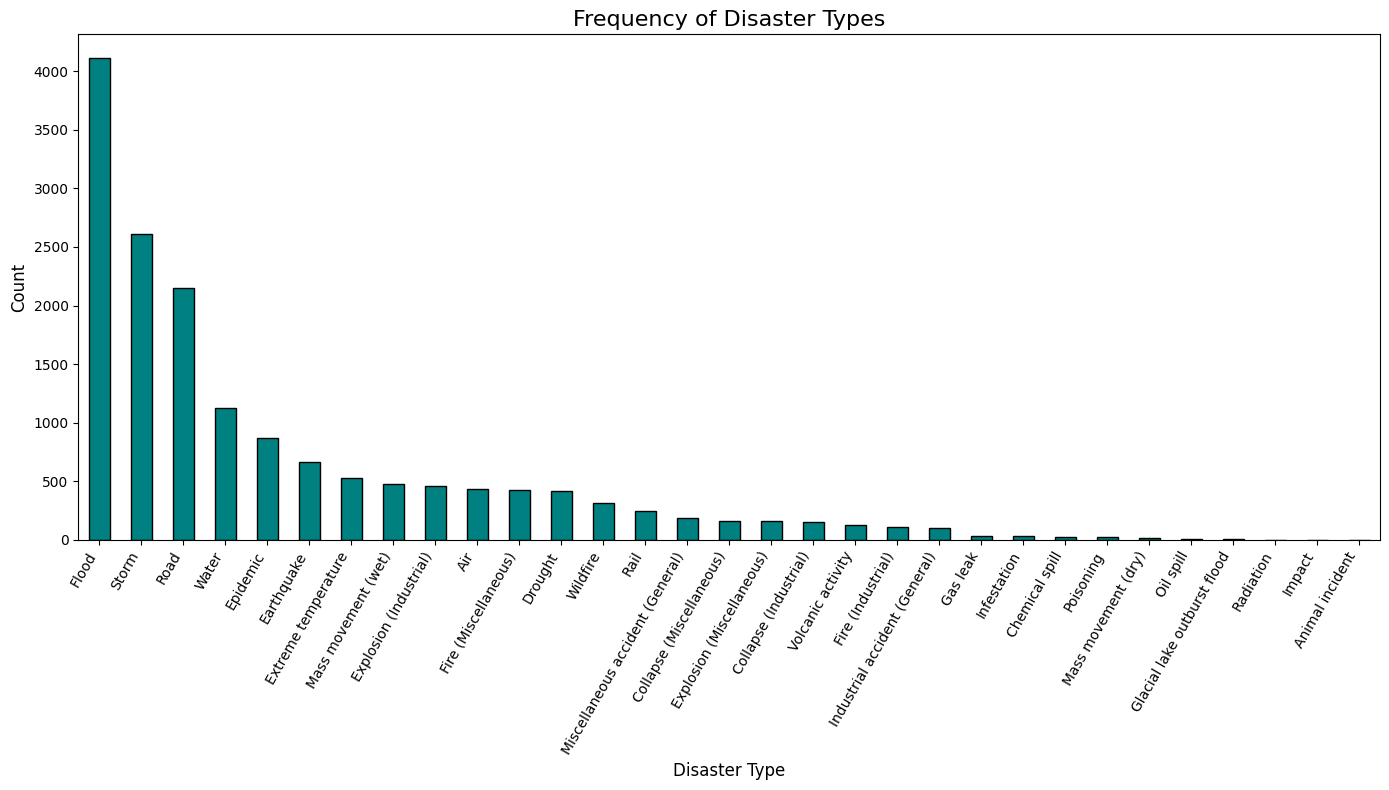

In [28]:
# Frequency of Each Disaster Type Over Time

disaster_counts = data['Disaster Type'].value_counts()
plt.figure(figsize=(14, 8))
disaster_counts.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Frequency of Disaster Types', fontsize=16)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)  # Increased rotation and adjusted alignment
plt.tight_layout()  # Ensures the layout fits within the figure
plt.show()

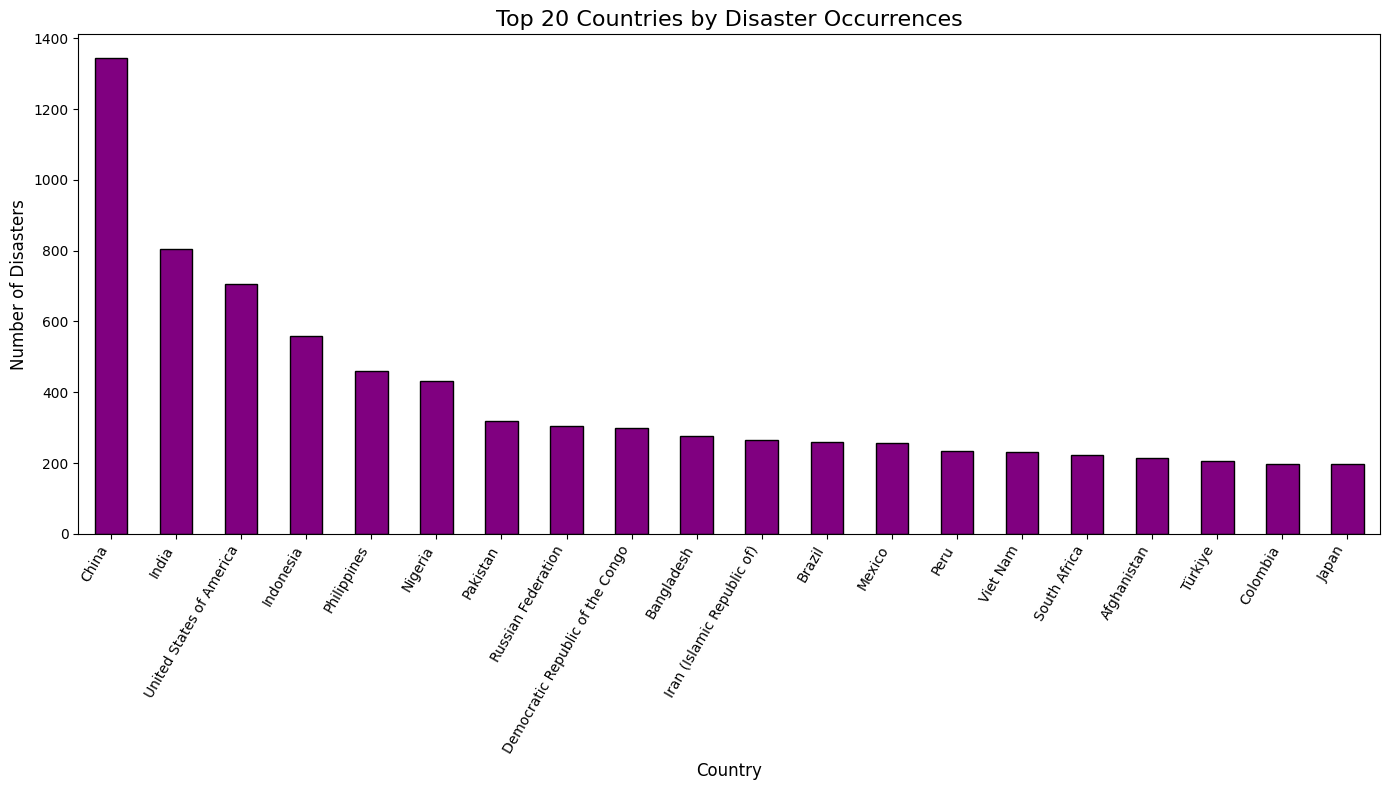

Country
China                               1344
India                                806
United States of America             705
Indonesia                            559
Philippines                          459
Nigeria                              432
Pakistan                             320
Russian Federation                   306
Democratic Republic of the Congo     299
Bangladesh                           275
Iran (Islamic Republic of)           265
Brazil                               260
Mexico                               257
Peru                                 235
Viet Nam                             232
South Africa                         223
Afghanistan                          214
Türkiye                              207
Colombia                             198
Japan                                196
Name: count, dtype: int64


In [29]:
# Geographical Analysis: Disaster Occurrences by Country

disaster_countries = data['Country'].value_counts().head(20)
plt.figure(figsize=(14, 8))
disaster_countries.plot(kind='bar', color='purple', edgecolor='black')
plt.title('Top 20 Countries by Disaster Occurrences', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Disasters', fontsize=12)
plt.xticks(rotation=60, ha='right', fontsize=10)  # Increased rotation and adjusted alignment
plt.tight_layout()  # Ensures the layout fits within the figure
plt.show()

print(disaster_countries)

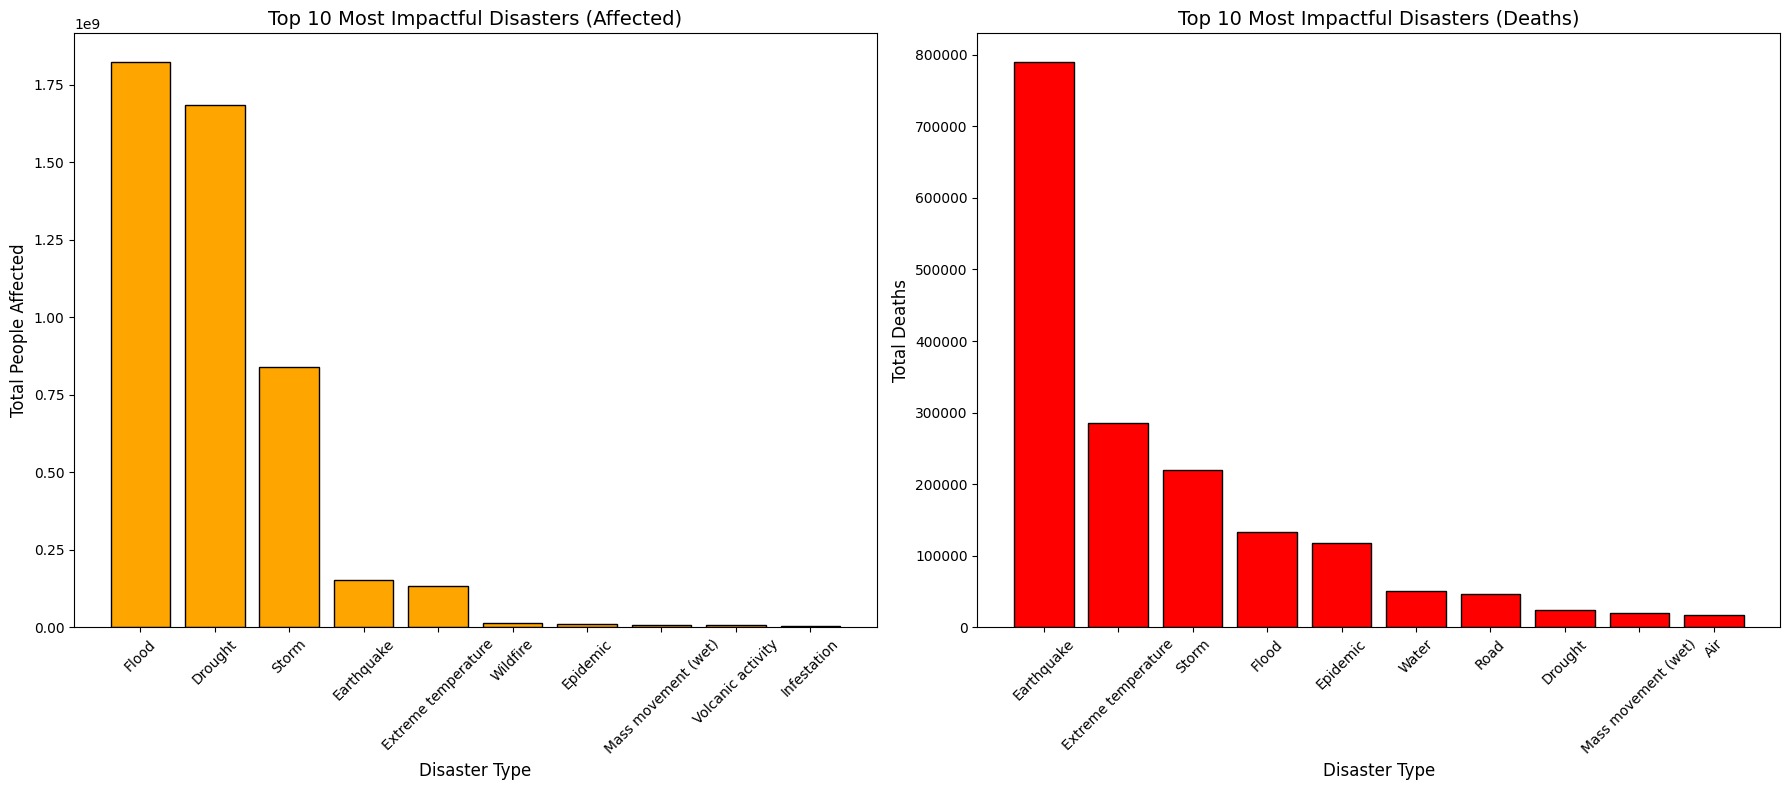

In [30]:
# Top 10 Most Impactful Disasters by Total Damages or Total Deaths

# Ensure numeric columns are properly formatted
data['Total Damages'] = pd.to_numeric(data['Total Affected'], errors='coerce')
data['Total Deaths'] = pd.to_numeric(data['Total Deaths'], errors='coerce')

# Aggregate by Disaster Type for both damages and deaths
impact_damages = data.groupby('Disaster Type')['Total Damages'].sum().sort_values(ascending=False).head(10)
impact_deaths = data.groupby('Disaster Type')['Total Deaths'].sum().sort_values(ascending=False).head(10)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot for Total Damages
axes[0].bar(impact_damages.index, impact_damages.values, color='orange', edgecolor='black')
axes[0].set_title('Top 10 Most Impactful Disasters (Affected)', fontsize=14)
axes[0].set_xlabel('Disaster Type', fontsize=12)
axes[0].set_ylabel('Total People Affected', fontsize=12)
axes[0].tick_params(axis='x', rotation=45, labelsize=10)

# Plot for Total Deaths
axes[1].bar(impact_deaths.index, impact_deaths.values, color='red', edgecolor='black')
axes[1].set_title('Top 10 Most Impactful Disasters (Deaths)', fontsize=14)
axes[1].set_xlabel('Disaster Type', fontsize=12)
axes[1].set_ylabel('Total Deaths', fontsize=12)
axes[1].tick_params(axis='x', rotation=45, labelsize=10)

# Adjust layout
plt.tight_layout()
plt.show()


In [34]:
def plot_top_10_disasters(data, metric='Total Deaths', group_by='Event Name', title=None):
    # Ensure the metric column is numeric
    data[metric] = pd.to_numeric(data[metric], errors='coerce')

    # Group by the specified column and sum the metric values
    grouped_df = data.groupby(group_by)[metric].sum().reset_index()

    # Sort the grouped DataFrame and select the top 10
    top_10_disasters = grouped_df.nlargest(10, metric)

    # Ensure the grouping column is of type string
    top_10_disasters[group_by] = top_10_disasters[group_by].astype(str)

    # Set default title if none is provided
    if title is None:
        title = f"Top 10 Most Impactful Disasters (by {metric})"

    # Create a horizontal bar plot
    plt.figure(figsize=(14, 7))
    bars = plt.barh(top_10_disasters[group_by], top_10_disasters[metric], color='royalblue')

    # Annotate the bars with their respective values
    for bar in bars:
        plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=10)

    # Add labels and title
    plt.xlabel(metric, fontsize=12)
    plt.title(title, fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

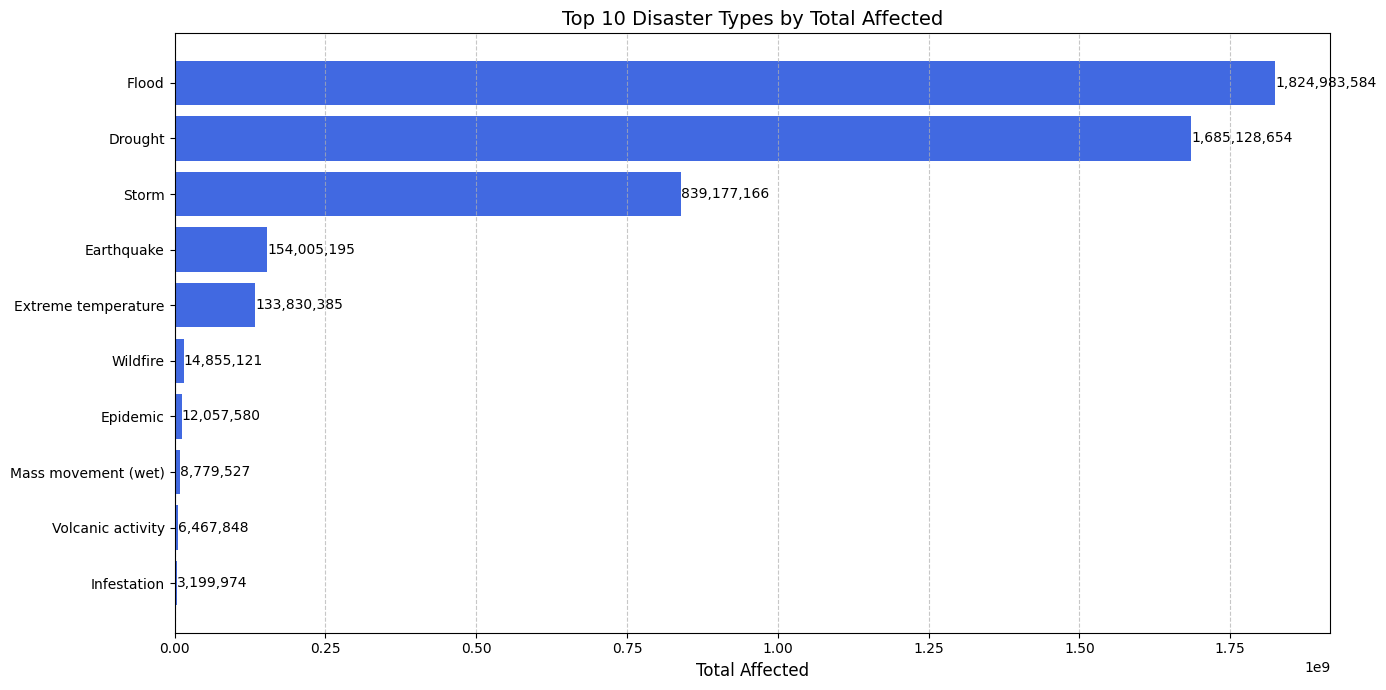

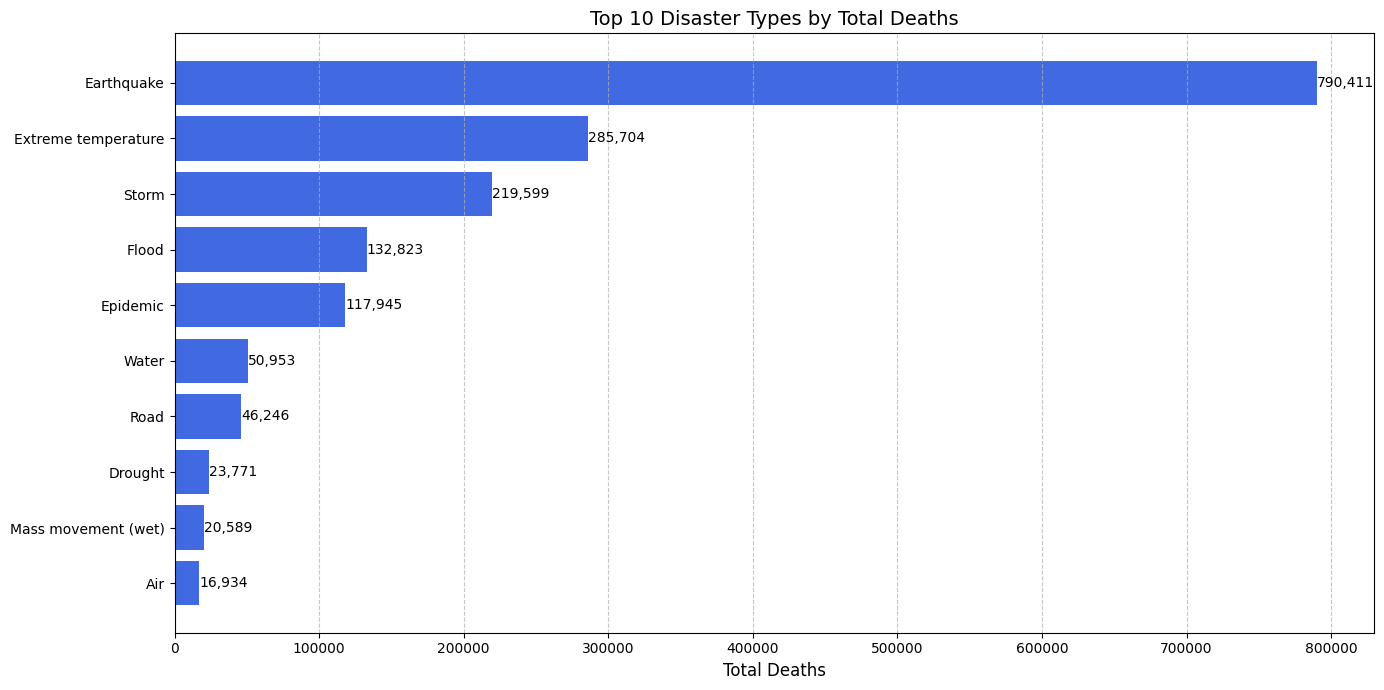

In [35]:
plot_top_10_disasters(data, metric='Total Affected', group_by='Disaster Type', title="Top 10 Disaster Types by Total Affected")
plot_top_10_disasters(data, metric='Total Deaths', group_by='Disaster Type', title="Top 10 Disaster Types by Total Deaths")

In [41]:
def plot_top_10_disasters(data, metric='Total Deaths', group_by='Event Name', title=None):
    # Ensure the metric column is numeric
    data[metric] = pd.to_numeric(data[metric], errors='coerce')
    
    #Remove the "unknown" from event name 
    plot_data = data[~data[group_by].str.contains('unknown', case=False, na=False)]

    # Group by the specified column and sum the metric values
    grouped_df = plot_data.groupby(group_by)[metric].sum().reset_index()

    # Sort the grouped DataFrame and select the top 10
    top_10_disasters = grouped_df.nlargest(10, metric)
    
    # Ensure the grouping column is of type string
    top_10_disasters[group_by] = top_10_disasters[group_by].astype(str)

    # Set default title if none is provided
    if title is None:
        title = f"Top 10 Most Impactful Named Disasters (by {metric})"

    # Create a horizontal bar plot
    plt.figure(figsize=(14, 7))
    bars = plt.barh(top_10_disasters[group_by], top_10_disasters[metric], color='forestgreen')

    # Annotate the bars with their respective values
    for bar in bars:
        plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2,
                 f'{bar.get_width():,.0f}', va='center', ha='left', fontsize=10)

    # Add labels and title
    plt.xlabel(metric, fontsize=12)
    plt.title(title, fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis to have the highest value on top
    plt.grid(axis='x', linestyle='--', alpha=0.7)

    # Show the plot
    plt.tight_layout()
    plt.show()

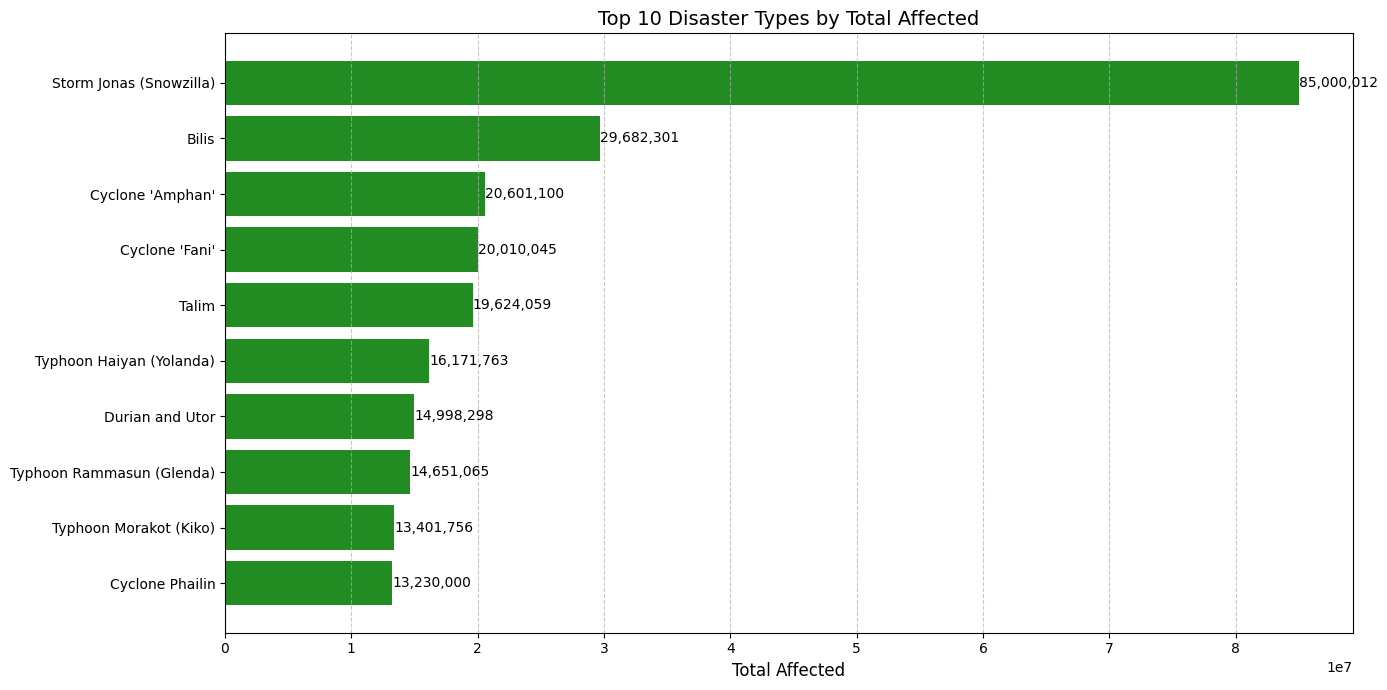

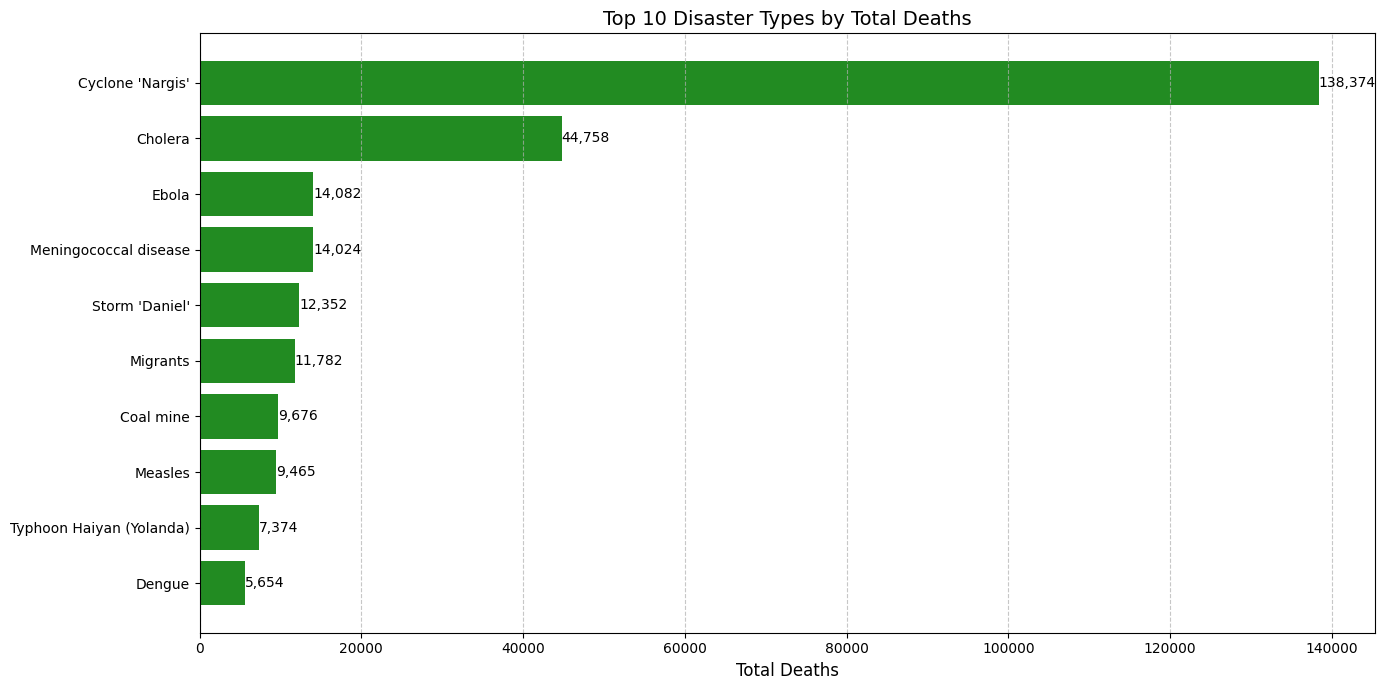

In [42]:
plot_top_10_disasters(data, metric='Total Affected', group_by='Event Name', title="Top 10 Disaster Types by Total Affected")
plot_top_10_disasters(data, metric='Total Deaths', group_by='Event Name', title="Top 10 Disaster Types by Total Deaths")

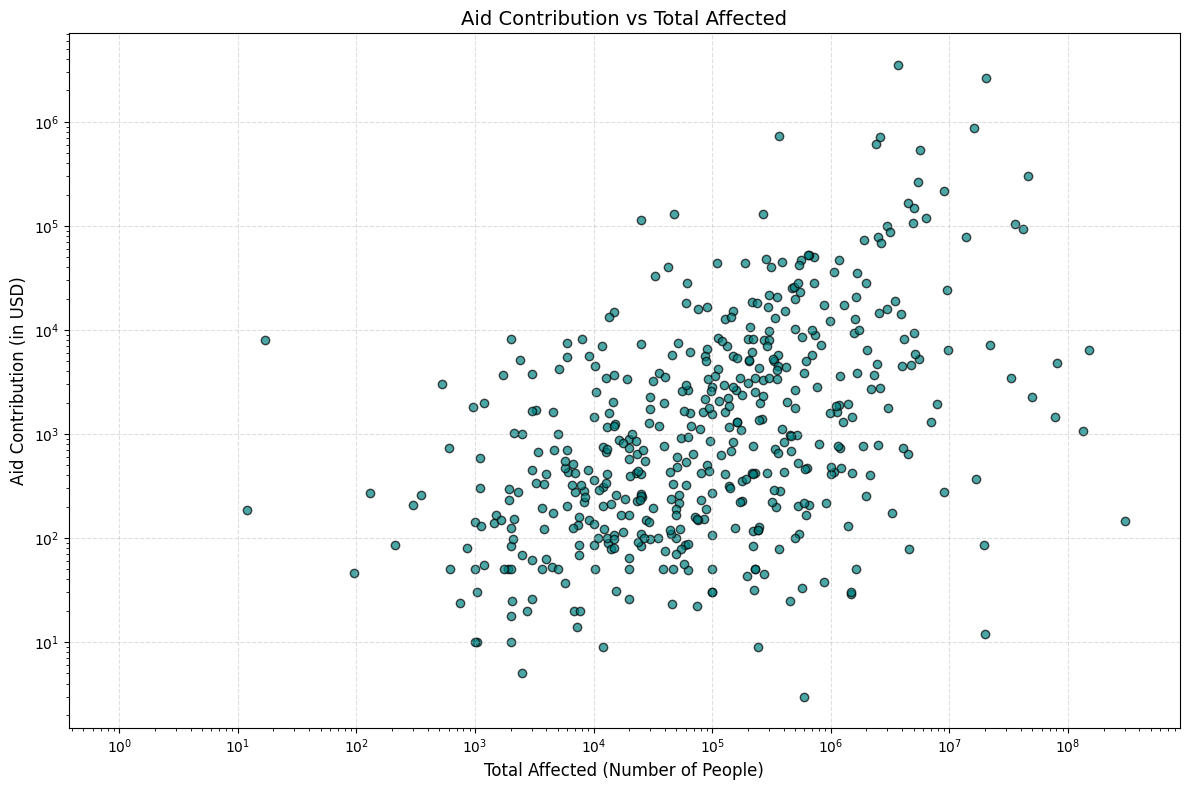

In [53]:
# Ensure the required columns are numeric
data['Total Affected'] = pd.to_numeric(data['Total Affected'], errors='coerce')
data['Aid Contribution'] = pd.to_numeric(data['AID Contribution (\'000 US$)'], errors='coerce')

# Remove rows with missing data in either column
plot_data = data.dropna(subset=['Total Affected', 'Aid Contribution'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(plot_data['Total Affected'], plot_data['Aid Contribution'], alpha=0.7, color='teal', edgecolors='black')

# Add labels, title, and grid
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Aid Contribution (in USD)', fontsize=12)
plt.title('Aid Contribution vs Total Affected', fontsize=14)
plt.grid(alpha=0.4, linestyle='--')

# Adjust log scale for better visualization if the data range is large
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
# !python3.9 -m pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.9 MB/s eta 0:00:00


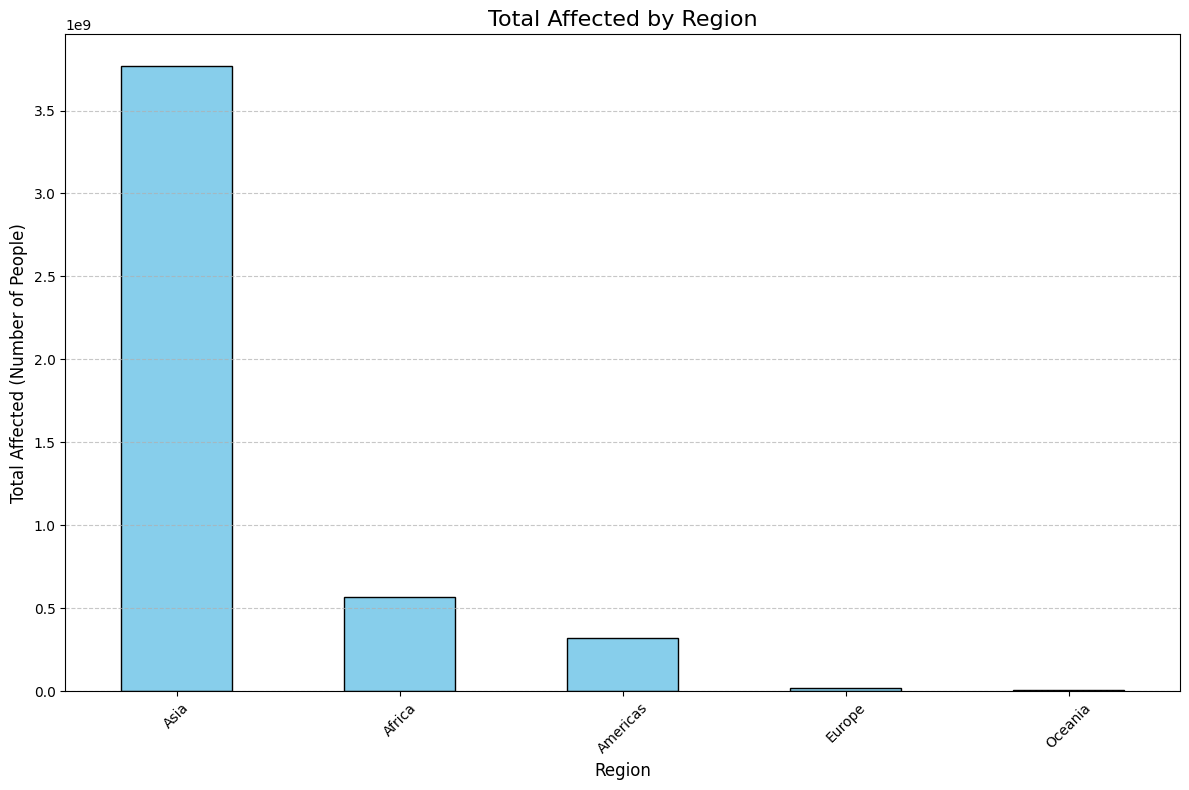

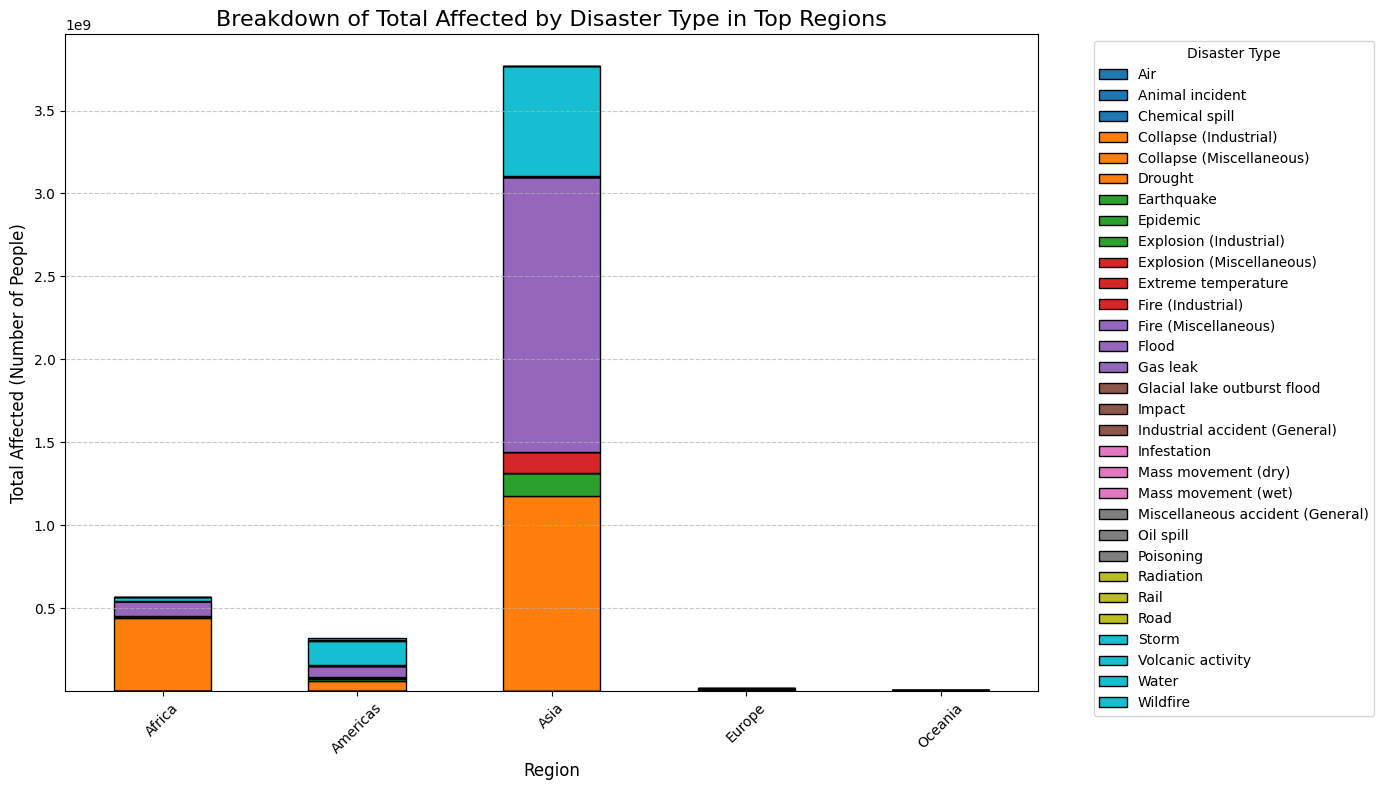

In [54]:
# Ensure numeric columns are properly formatted
data['Total Affected'] = pd.to_numeric(data['Total Affected'], errors='coerce')

# Drop rows with missing values in critical columns
data_cleaned = data.dropna(subset=['Country', 'Total Affected', 'Disaster Type'])

# Ensure numeric columns are properly formatted
data_cleaned.loc[:, 'Total Affected'] = pd.to_numeric(data_cleaned['Total Affected'], errors='coerce')

# Aggregate data by Region or Country and Disaster Type
geo_data = data_cleaned.groupby(['Region', 'Disaster Type'], as_index=False)['Total Affected'].sum()

# Get the top 10 most affected regions for better visualization
top_regions = geo_data.groupby('Region')['Total Affected'].sum().nlargest(10).index
filtered_geo_data = geo_data[geo_data['Region'].isin(top_regions)]

# Plot 1: Total Affected by Region
region_data = filtered_geo_data.groupby('Region')['Total Affected'].sum()
plt.figure(figsize=(12, 8))
region_data.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Affected by Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Affected (Number of People)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot 2: Breakdown by Disaster Type for Top Regions
disaster_data = filtered_geo_data.groupby(['Region', 'Disaster Type'])['Total Affected'].sum().unstack()
disaster_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10', edgecolor='black')
plt.title('Breakdown of Total Affected by Disaster Type in Top Regions', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Affected (Number of People)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Disaster Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


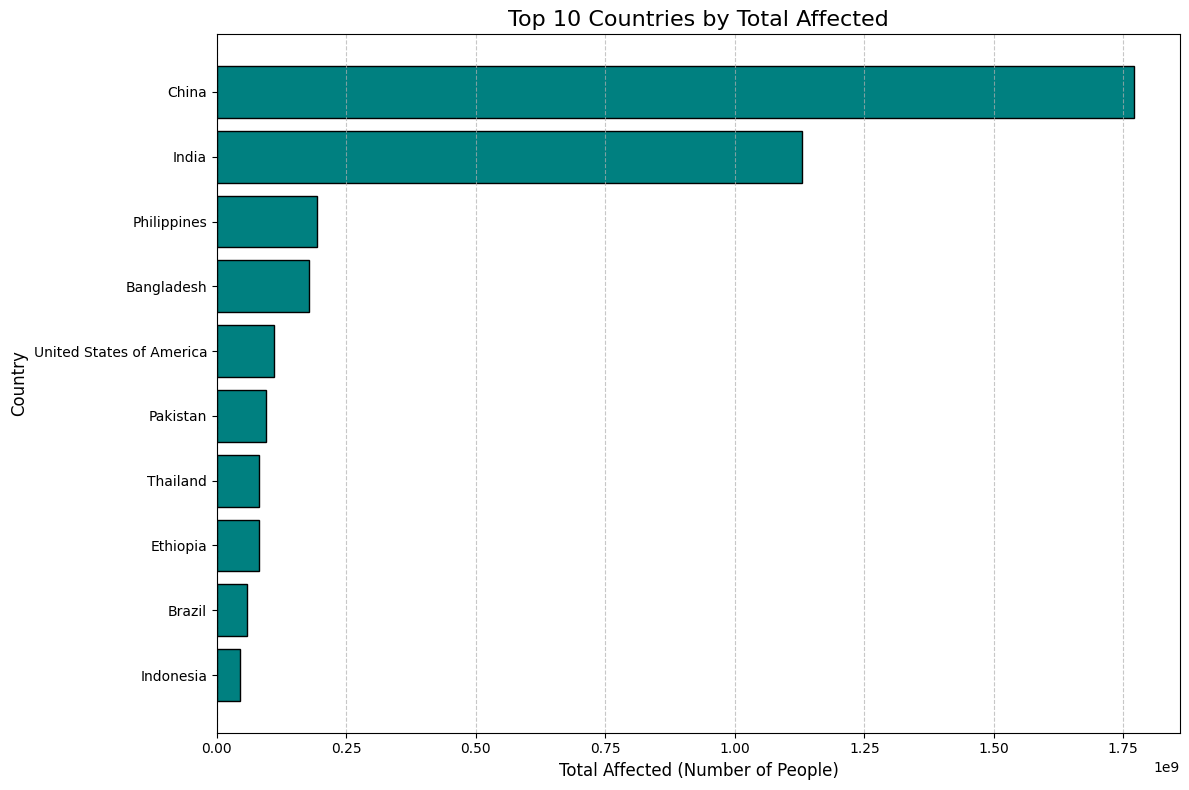

In [56]:
# Aggregate data at different geographic levels
country_data = data_cleaned.groupby('Country', as_index=False)['Total Affected'].sum()
subregion_data = data_cleaned.groupby('Subregion', as_index=False)['Total Affected'].sum()
region_data = data_cleaned.groupby('Region', as_index=False)['Total Affected'].sum()
location_data = data_cleaned.groupby('Location', as_index=False)['Total Affected'].sum()

# Plot 1: Total Affected by Country
plt.figure(figsize=(12, 8))
top_countries = country_data.nlargest(10, 'Total Affected')
plt.barh(top_countries['Country'], top_countries['Total Affected'], color='teal', edgecolor='black')
plt.title('Top 10 Countries by Total Affected', fontsize=16)
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest bar on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

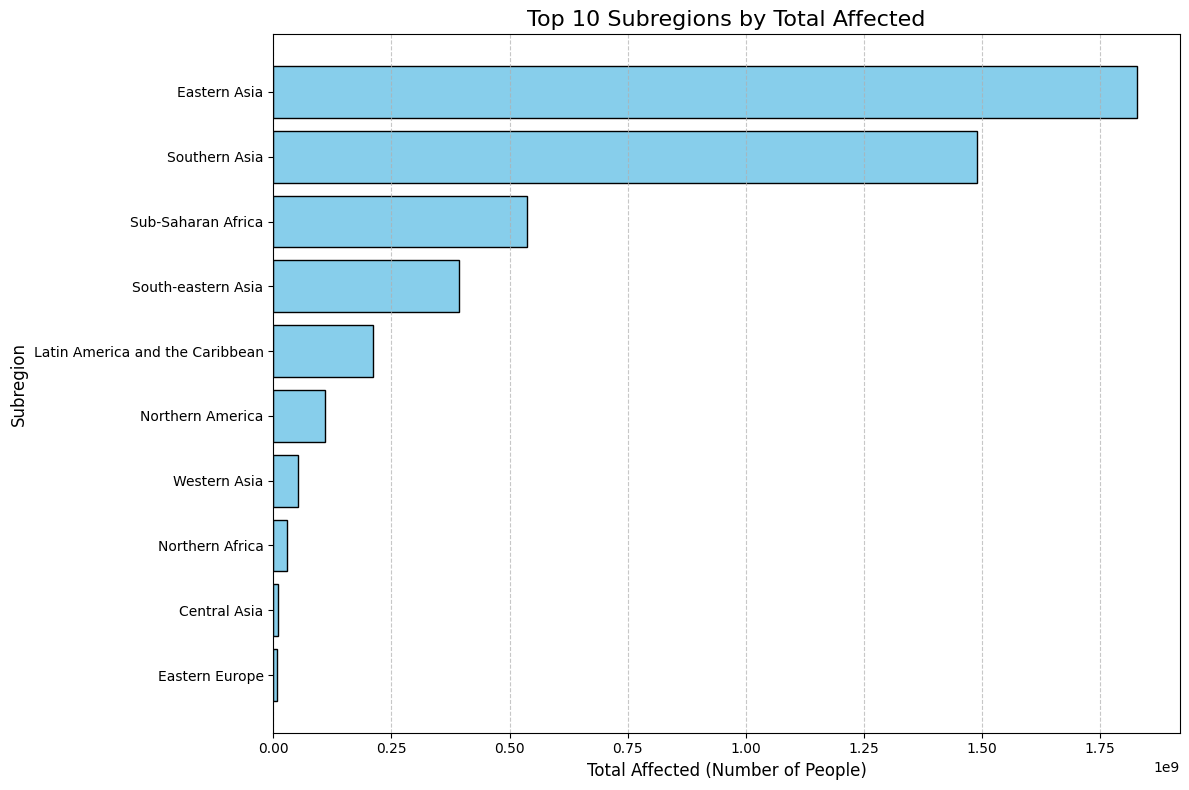

In [57]:
# Plot 2: Total Affected by Subregion
plt.figure(figsize=(12, 8))
top_subregions = subregion_data.nlargest(10, 'Total Affected')
plt.barh(top_subregions['Subregion'], top_subregions['Total Affected'], color='skyblue', edgecolor='black')
plt.title('Top 10 Subregions by Total Affected', fontsize=16)
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Subregion', fontsize=12)
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

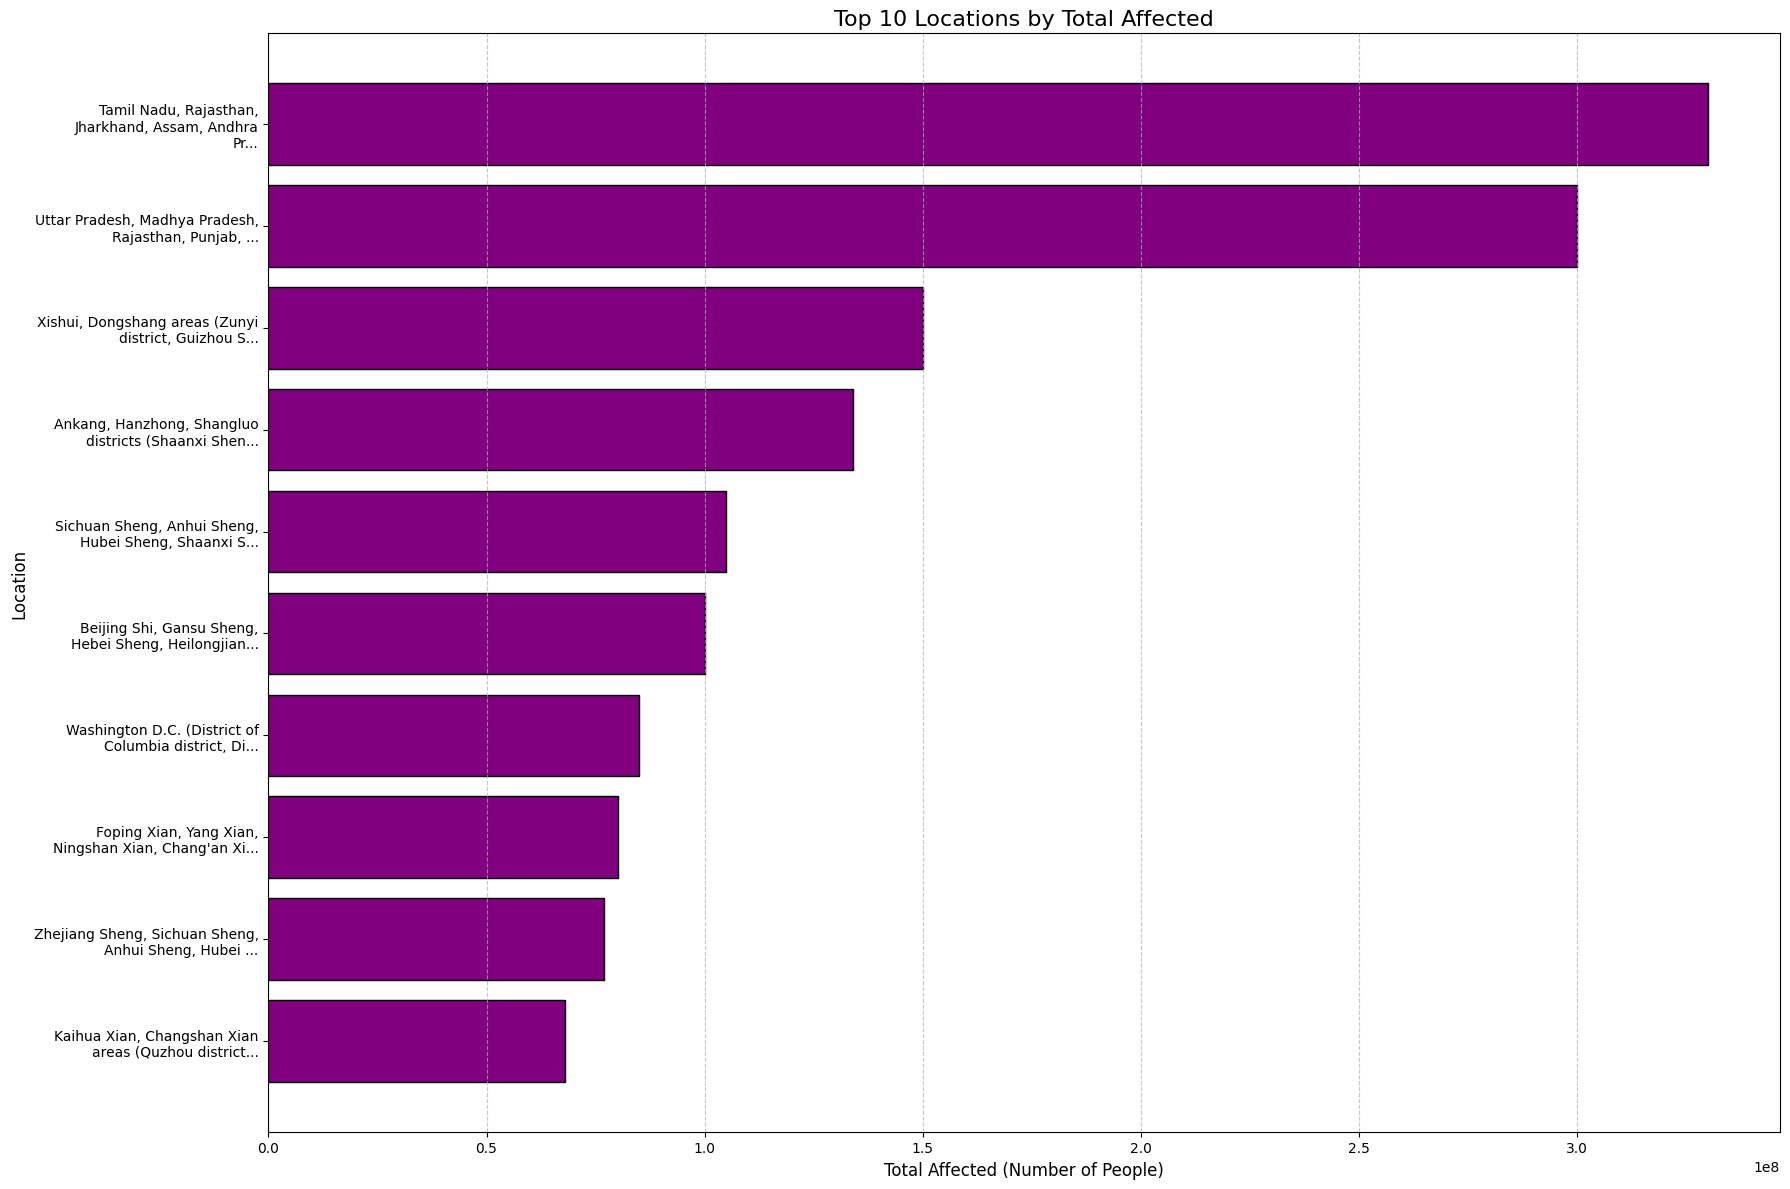

In [61]:
# Plot 4: Total Affected by Location
from textwrap import wrap

# Increase figure size to give more space
plt.figure(figsize=(18, 12))

# Truncate long location names for better readability
top_locations['Location'] = top_locations['Location'].apply(lambda x: (x[:50] + '...') if len(x) > 50 else x)

# Plot horizontal bar chart
plt.barh(top_locations['Location'], top_locations['Total Affected'], color='purple', edgecolor='black')
plt.title('Top 10 Locations by Total Affected', fontsize=16)
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Location', fontsize=12)
plt.gca().invert_yaxis()  # Invert y-axis to have the largest bar on top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.yticks(fontsize=10)  # Reduce font size for y-axis labels
plt.tight_layout()
plt.show()

In [46]:
data = pd.read_csv("./data/emdat_2020-2024_cleaned.csv")
print(data['Start Day'].head(10))
print(data['End Day'].head(10))

0     1
1     1
2     1
3    26
4     8
5     1
6    12
7     1
8     9
9    13
Name: Start Day, dtype: int64
0     1
1     1
2     1
3    26
4    15
5     1
6    12
7     1
8     9
9    13
Name: End Day, dtype: int64


In [91]:
data = pd.read_csv("./data/emdat_2020-2024_cleaned.csv")

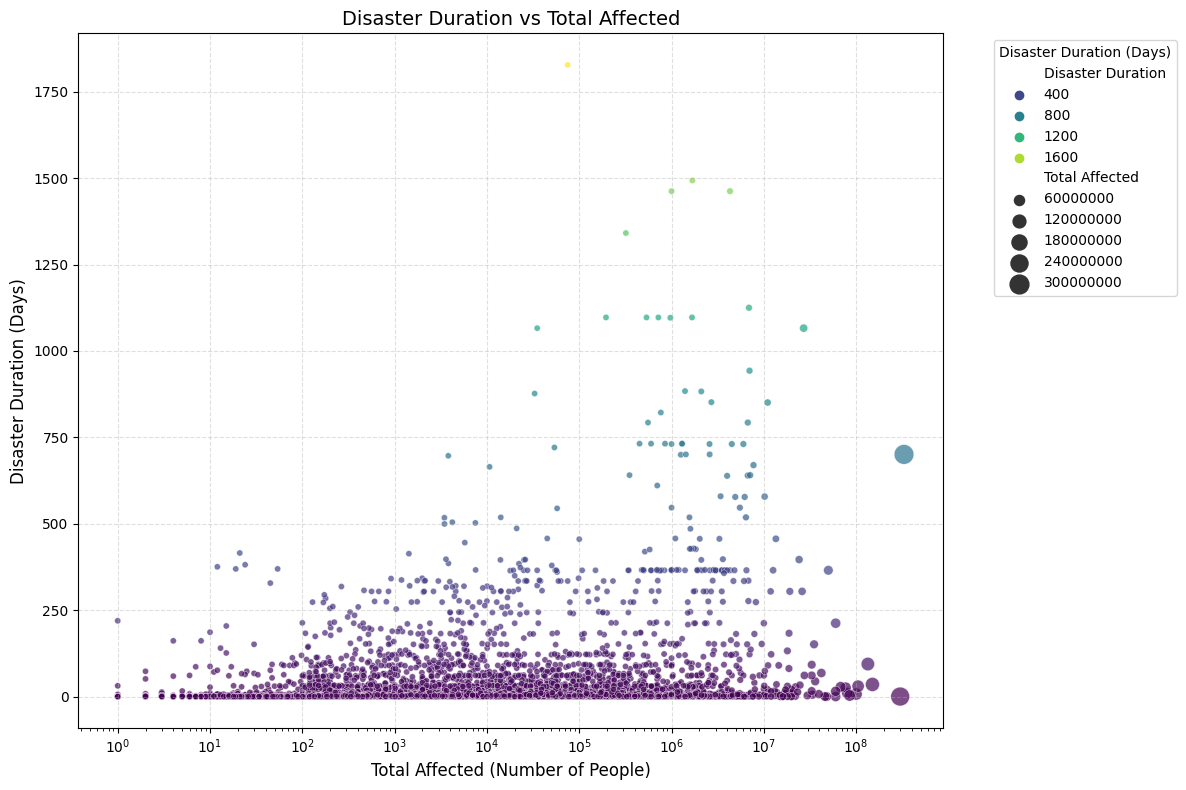

In [92]:
# Scatter Plot: Population Affected vs. Disaster Duration

# Drop the rows from Total Affected that have a -1 
data_c = data[(data['Total Affected'] > 0)]

# Remove rows with missing data in either column
plot_data = data_c.dropna(subset=['Total Affected', 'Disaster Duration'])

# Creating an enhanced scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['Total Affected'],
    y=data['Disaster Duration'],
    hue='Disaster Duration',  # Differentiating by disaster duration
    size='Total Affected',  # Scaling points by affected population
    data=plot_data,
    sizes=(20, 200),
    alpha=0.7,
    palette='viridis'
)

# Add labels, title, and grid
plt.xlabel('Total Affected (Number of People)', fontsize=12)
plt.ylabel('Disaster Duration (Days)', fontsize=12)
plt.title('Disaster Duration vs Total Affected', fontsize=14)
plt.grid(alpha=0.4, linestyle='--')
plt.xscale('log')  # Log scale for better visibility of data spread

# Show legend
plt.legend(title='Disaster Duration (Days)', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout and display
plt.tight_layout()
plt.show()

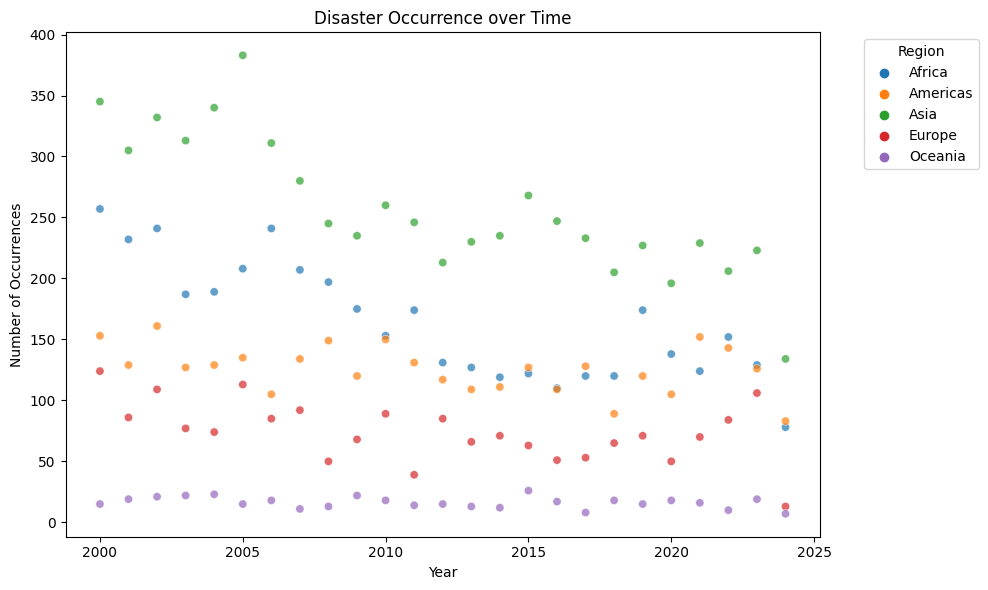

In [93]:
# Scatter Plot: Disaster Occurrence over Time

# Calculate disaster count per year and region (if not already present)
disaster_count_data = data.groupby(['Start Year', 'Region']).size().reset_index(name='Disaster Count')

# Rename 'Start Year' to 'Year' for consistency in the plot
disaster_count_data.rename(columns={'Start Year': 'Year'}, inplace=True)

# Scatter Plot: Disaster Occurrence over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=disaster_count_data,
    x="Year",
    y="Disaster Count",
    hue="Region",
    alpha=0.7
)
plt.title("Disaster Occurrence over Time")
plt.xlabel("Year")
plt.ylabel("Number of Occurrences")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

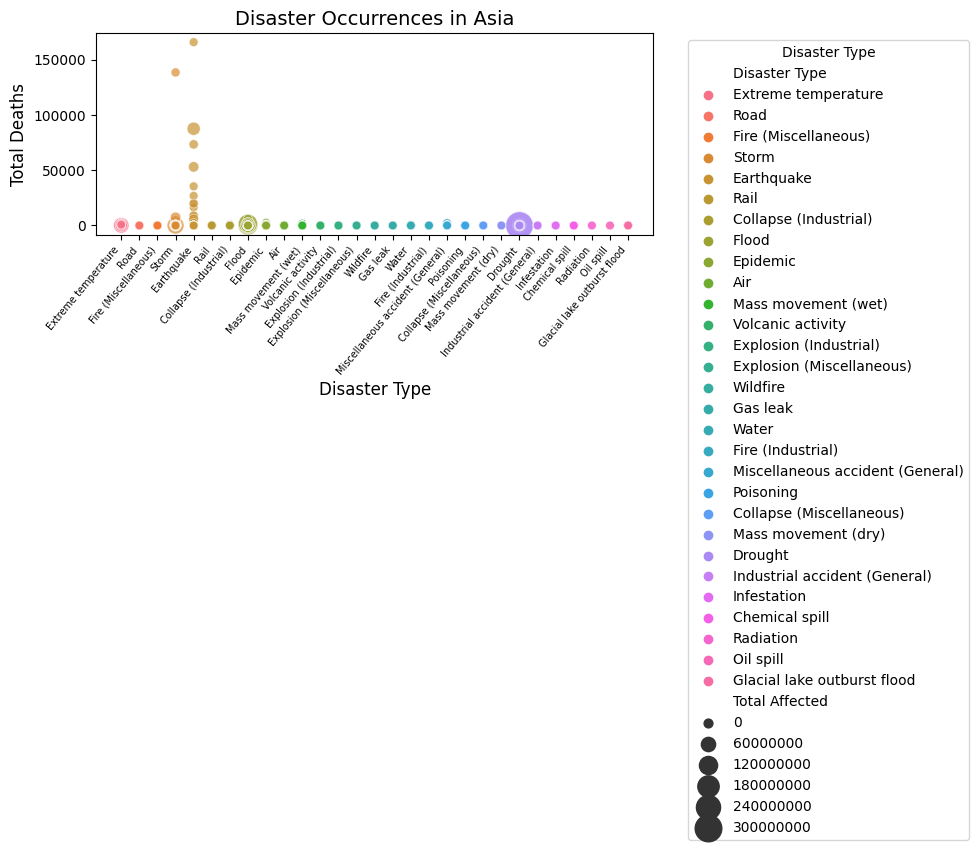

In [100]:
# Define the regions to plot
#regions = ['Asia', 'Africa', 'Americas', 'Europe']
region = 'Asia'

# Filter data for the current region
region_data = data[data['Region'] == region]

# Scatter Plot for the region
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Disaster Type', 
    y='Total Deaths', 
    size='Total Affected', 
    hue='Disaster Type', 
    data=region_data, 
    sizes=(40, 400), 
    alpha=0.7
)

# Add title and axis labels
plt.title(f'Disaster Occurrences in {region}', fontsize=14)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Disaster Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50, ha='right', fontsize=7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

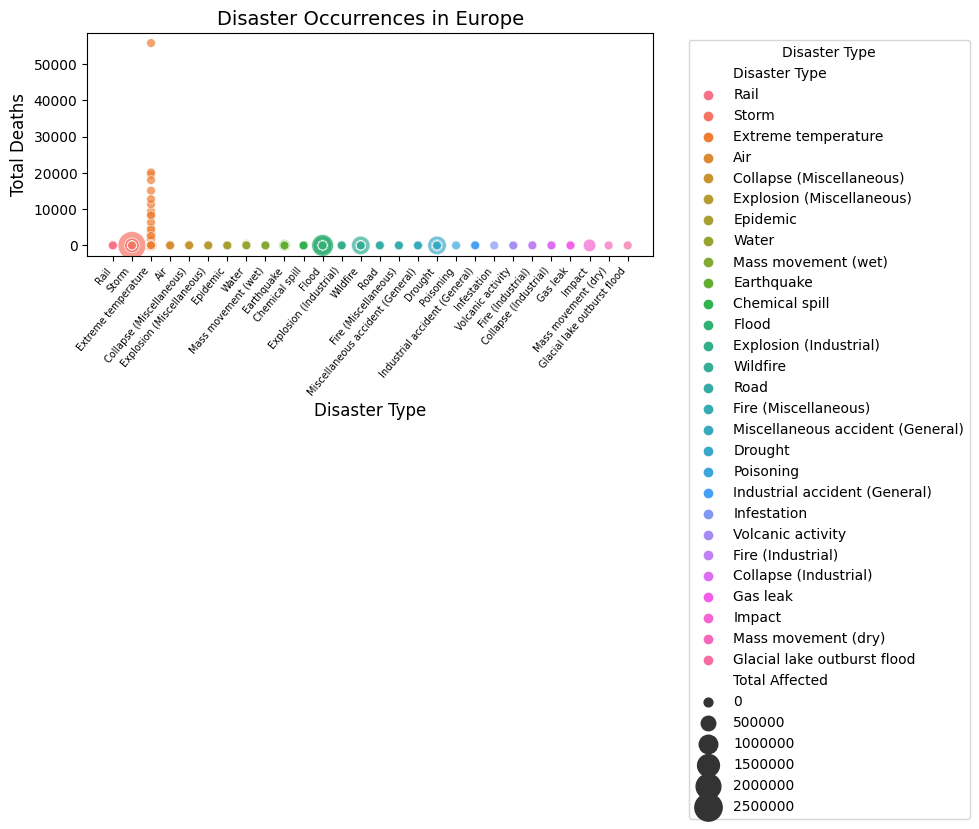

In [101]:
# Define the regions to plot
#regions = ['Asia', 'Africa', 'Americas', 'Europe']
region = 'Europe'

# Filter data for the current region
region_data = data[data['Region'] == region]

# Scatter Plot for the region
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Disaster Type', 
    y='Total Deaths', 
    size='Total Affected', 
    hue='Disaster Type', 
    data=region_data, 
    sizes=(40, 400), 
    alpha=0.7
)

# Add title and axis labels
plt.title(f'Disaster Occurrences in {region}', fontsize=14)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Disaster Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50, ha='right', fontsize=7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

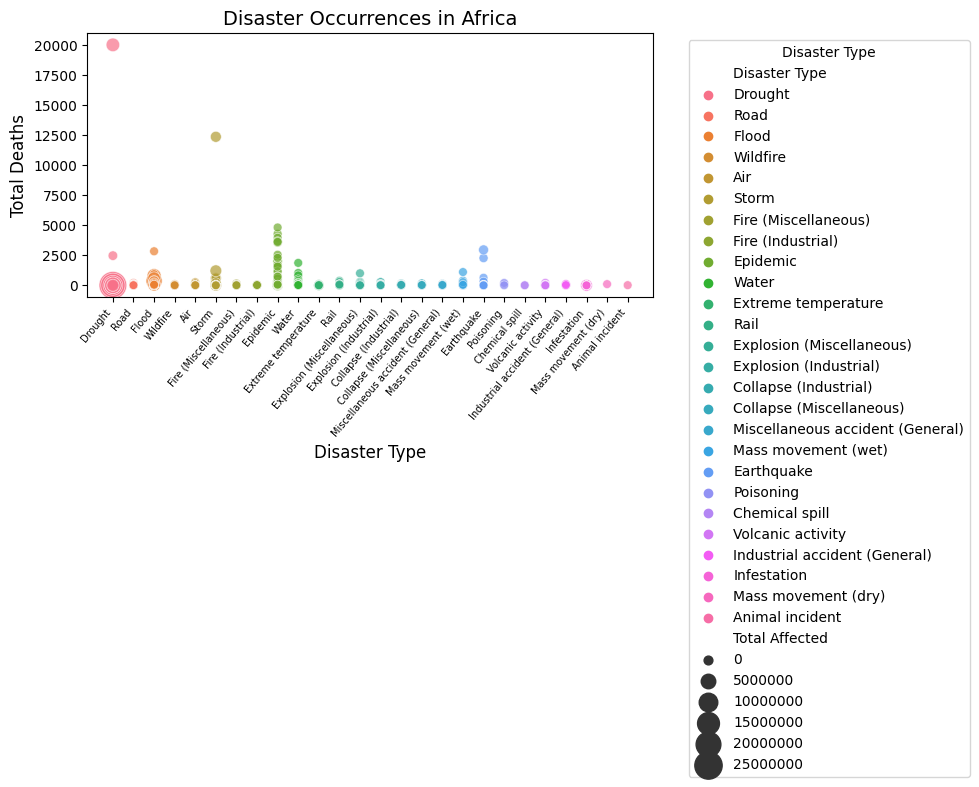

In [102]:
# Define the regions to plot
#regions = ['Asia', 'Africa', 'Americas', 'Europe']
region = 'Africa'

# Filter data for the current region
region_data = data[data['Region'] == region]

# Scatter Plot for the region
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Disaster Type', 
    y='Total Deaths', 
    size='Total Affected', 
    hue='Disaster Type', 
    data=region_data, 
    sizes=(40, 400), 
    alpha=0.7
)

# Add title and axis labels
plt.title(f'Disaster Occurrences in {region}', fontsize=14)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Disaster Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50, ha='right', fontsize=7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

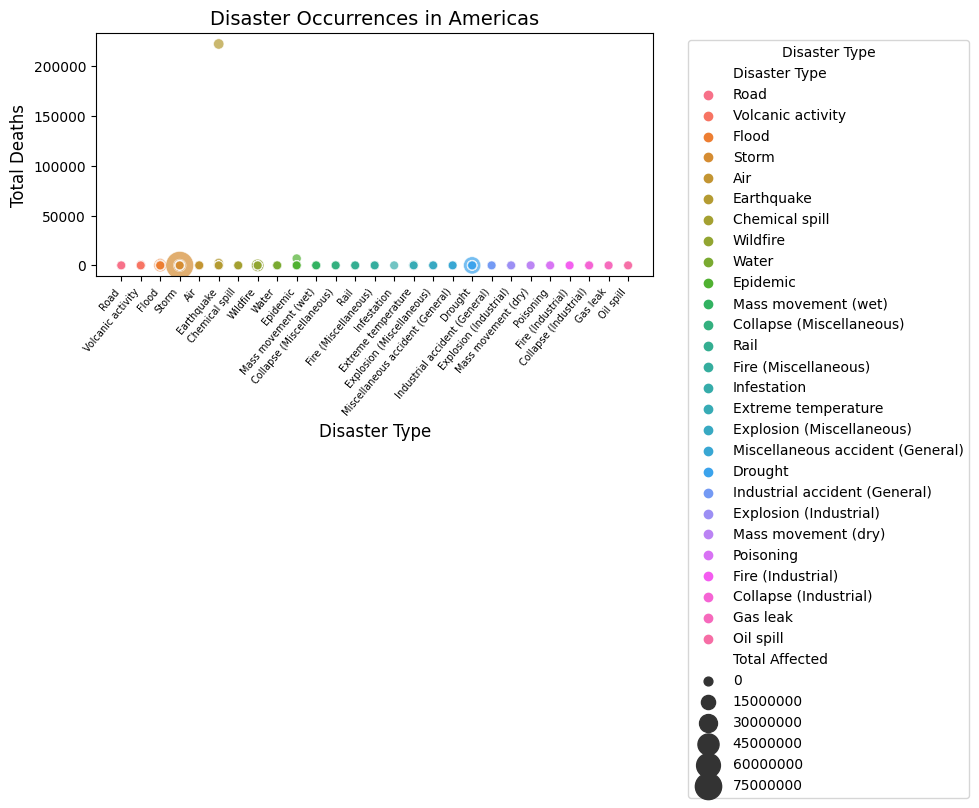

In [103]:
# Define the regions to plot
#regions = ['Asia', 'Africa', 'Americas', 'Europe']
region = 'Americas'

# Filter data for the current region
region_data = data[data['Region'] == region]

# Scatter Plot for the region
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Disaster Type', 
    y='Total Deaths', 
    size='Total Affected', 
    hue='Disaster Type', 
    data=region_data, 
    sizes=(40, 400), 
    alpha=0.7
)

# Add title and axis labels
plt.title(f'Disaster Occurrences in {region}', fontsize=14)
plt.xlabel('Disaster Type', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)

# Adjust legend position
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Disaster Type')

# Rotate x-axis labels for better readability
plt.xticks(rotation=50, ha='right', fontsize=7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

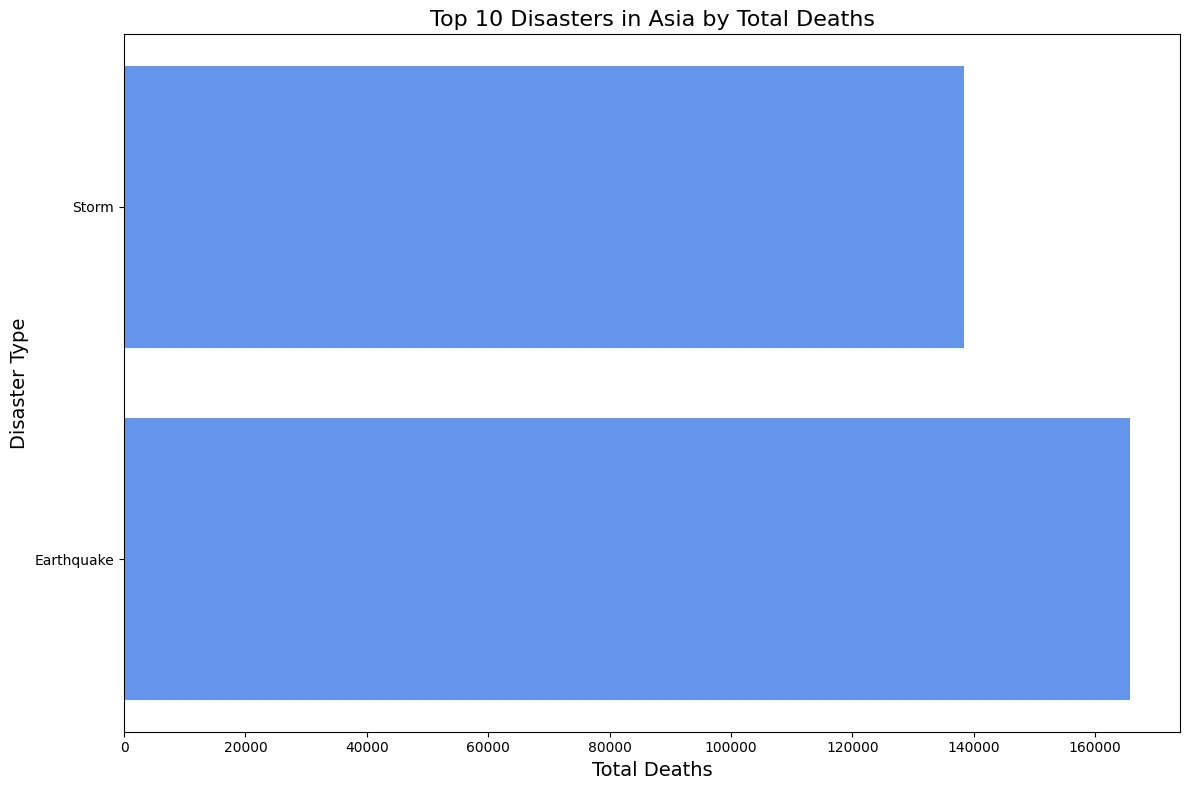

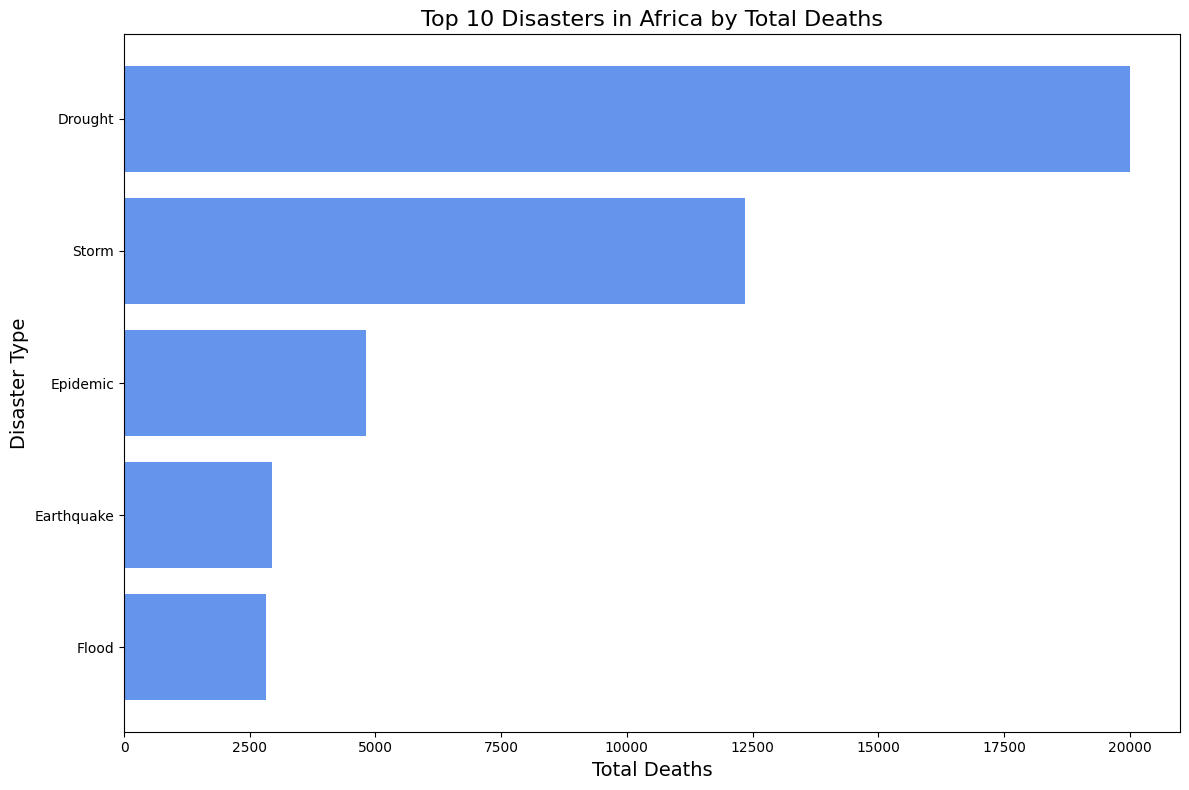

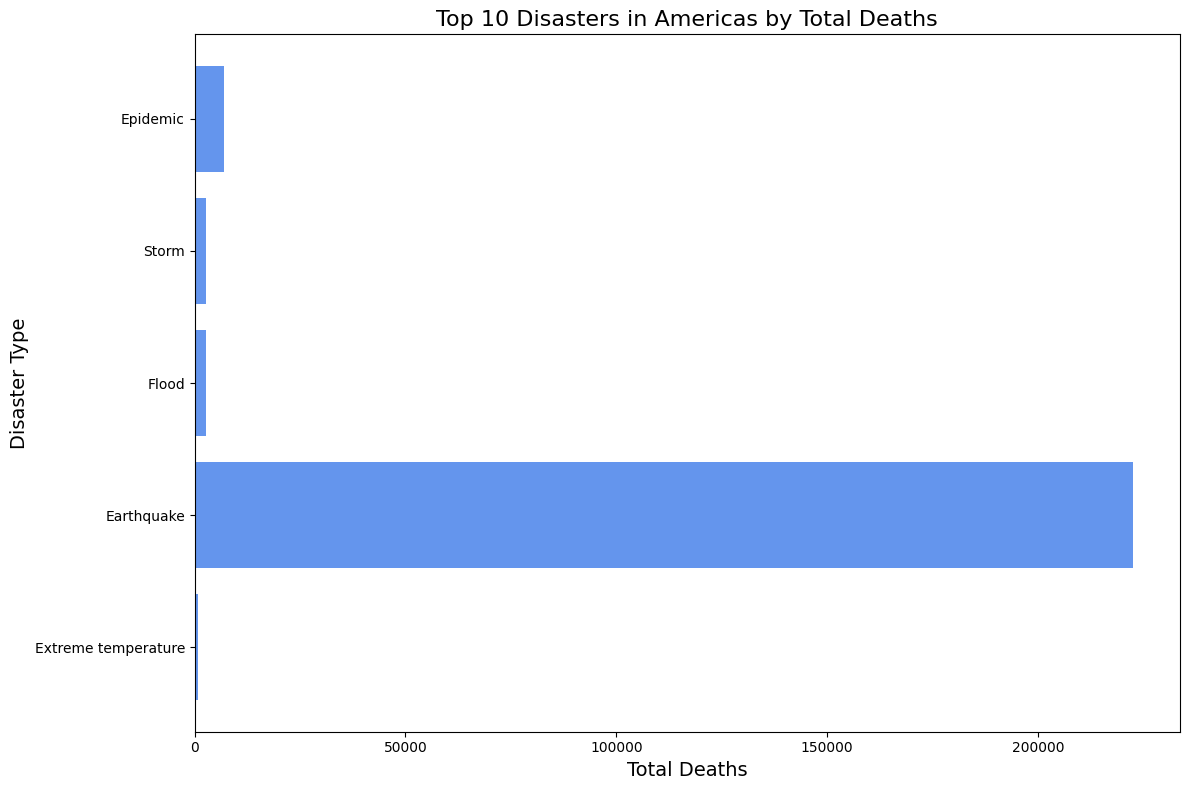

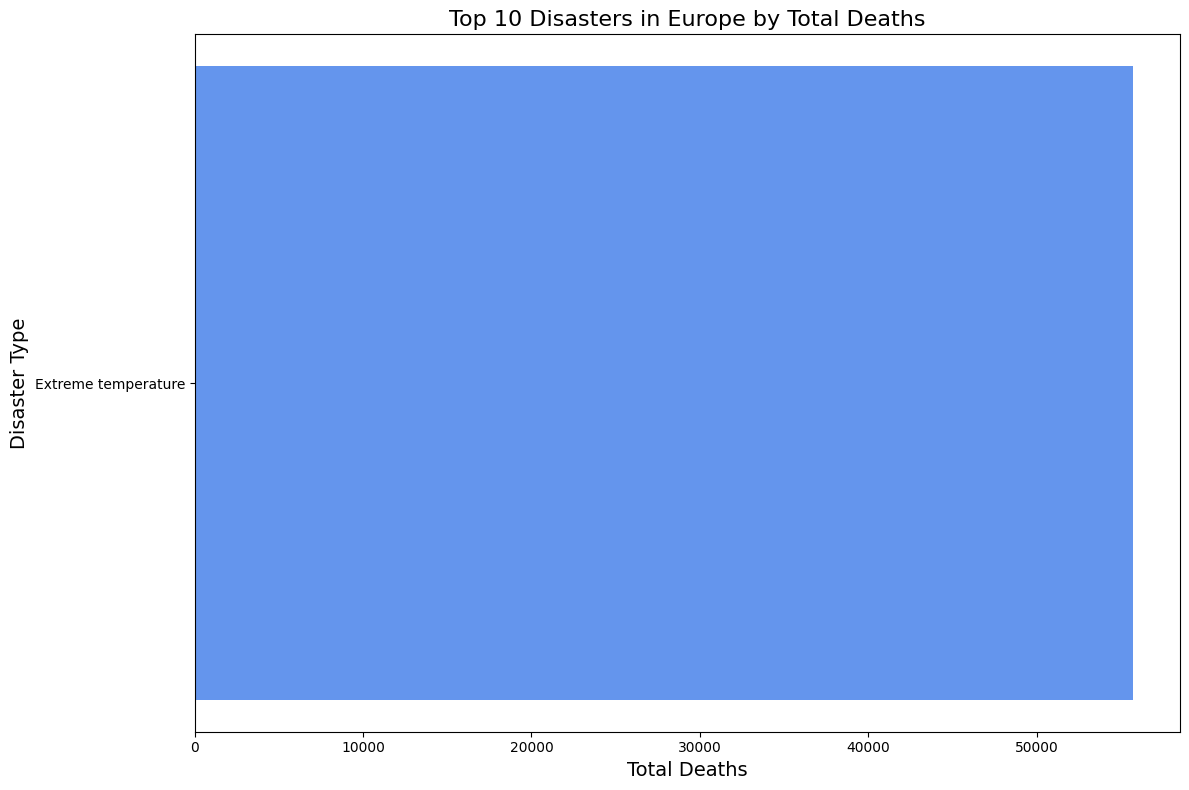

In [107]:
# Define regions
regions = ['Asia', 'Africa', 'Americas', 'Europe']

# Loop through each region and plot the top 10 disasters
for region in regions:
    # Filter data for the current region and get the top 10 disasters by Total Deaths
    region_data = data[data['Region'] == region].nlargest(10, 'Total Deaths')
    
    # Sort disasters by Total Deaths for better visualization
    region_data = region_data.sort_values(by='Total Deaths', ascending=True)
    
    # Bar Plot for the region
    plt.figure(figsize=(12, 8))  # Increased figure size
    bars = plt.barh(region_data['Disaster Type'], region_data['Total Deaths'], color='cornflowerblue')
    
    
    # Add title and labels
    plt.title(f'Top 10 Disasters in {region} by Total Deaths', fontsize=16)
    plt.xlabel('Total Deaths', fontsize=14)
    plt.ylabel('Disaster Type', fontsize=14)
    
    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()
